<a href="https://colab.research.google.com/github/joshfpedro/math-328/blob/main/newtons_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define Newton's method
def newton_method(f, df, x0, tol=1e-6, max_iter=100):
    """
    Newton's method for finding roots.

    Parameters:
    -----------
    f : function
        The function whose root we're finding
    df : function
        The derivative of f
    x0 : float
        Initial guess
    tol : float
        Tolerance for convergence
    max_iter : int
        Maximum number of iterations

    Returns:
    --------
    x : float
        Approximate root
    iterations : list
        History of iterations
    """
    x = x0
    iterations = [x]

    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)

        # Check if derivative is too small
        if abs(dfx) < 1e-12:
            print(f"Derivative too small at iteration {i}")
            break

        # Newton's update
        x_new = x - fx / dfx
        iterations.append(x_new)

        # Check convergence
        if abs(x_new - x) < tol:
            print(f"Converged in {i+1} iterations")
            return x_new, iterations

        x = x_new

    print(f"Did not converge in {max_iter} iterations")
    return x, iterations

In [2]:
# Define functions (here we used lambda notation)
f = lambda x: x**2 - 2
df = lambda x: 2*x

# Find root
root, history = newton_method(f,            # Function
                              df,           # Derivative
                              x0=1.0,         # Initial guess
                              tol=1e-10)    # Tolerance threshod

print(f"√2 ≈ {root}")
print(f"Error: {abs(root - np.sqrt(2))}")

Converged in 5 iterations
√2 ≈ 1.4142135623730951
Error: 0.0


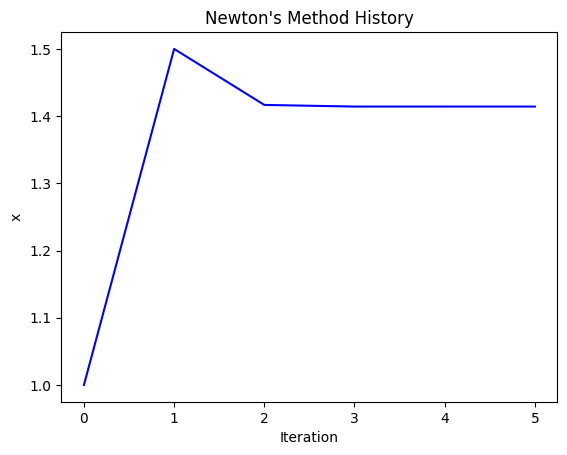

In [3]:
# Plot history and np.sqrt(2) exact root
plt.plot(history, 'b', label='x_n')
plt.xlabel("Iteration")
plt.ylabel("x")
plt.title("Newton's Method History")
plt.show()

In [4]:
history

[1.0,
 1.5,
 1.4166666666666667,
 1.4142156862745099,
 1.4142135623746899,
 1.4142135623730951]

### When Newton's method fails

In [13]:
# Example where derivative is zero
f = lambda x: np.sqrt(np.abs(x))
df = lambda x: 0.5 / np.sqrt(np.abs(x))

# Find root
root, history = newton_method(f,            # Function
                              df,           # Derivative
                              x0=0.1,        # Initial guess
                              tol=1e-10)    # Tolerance threshod

print(f"0 ≈ {root}")
print(f"Error: {abs(root - 0)}")

Derivative too small at iteration 86
Did not converge in 100 iterations
0 ≈ -3.5917545547686064e+39
Error: 3.5917545547686064e+39


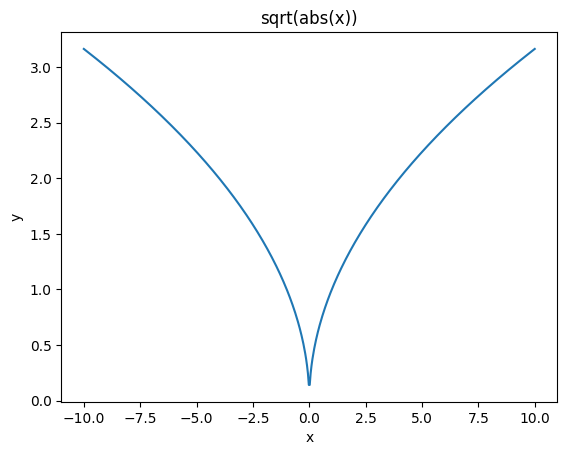

In [11]:
# Plot np.sqrt(np.abs(x))
x_vals = np.linspace(-10, 10, 500)
y_vals = [np.sqrt(np.abs(x)) for x in x_vals]

plt.plot(x_vals, y_vals)
plt.xlabel("x")
plt.ylabel("y")
plt.title("sqrt(abs(x))")
plt.show()